In [1]:
import pandas as pd
from mcrforest.forest import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score


# expand head function
pd.set_option('display.max_columns', None)

#load in full data set
df = pd.read_csv('df_anal_01.csv', encoding = "latin", error_bad_lines = False, low_memory=False,)
df = df.drop("Unnamed: 0",axis=1)


#### STEP 1 - FINAL STAGES OF DATA PREPARATION FOR ANALYSIS ####
# Extract features and labels
labels = df['risk_category_code_binary']
features = df.drop('risk_category_code_binary', axis = 1)
labels = labels.replace([2], [1])


# Convert to numpy arrays
import numpy as np
X = features
y = labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

params = {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 12*5, 'n_jobs': -1}
print(f'Refitting with best params: {params}')
model = RandomForestClassifier( **params )

print('Doing the RF fit')
model.fit(X,y)

non_groups = ['public_sector', 'Rescued', 'health_insur_true', 'Total_pop', 'area', 'smartphone', 'perimtr', 'bolsa_prop_true', 'Pop_Density', 'dist_rescue_km', 'num_sectors', 'cod_rgn', 'cod_stt', 'indigenous_cover', 'favela_true', 'middle_class']



mcr_groupings =  [ ['age_prop_18_to_23', 'age_prop_24_to_28', 'age_prop_29_to_33', 'age_prop_34_to_38', 'age_prop_39_to_43', 'age_prop_44_to_48', 'age_prop_49_to_53', 'age_prop_54_to_58', 'age_prop_59_to_65', 'age_prop_above_65'],  ['gender_prop_f', 'gender_prop_i', 'gender_prop_m'],  ['Pop_Men', 'Pop_Women'], ['Inspection_w_rescue', 'Inspection'] , ['biome_cover_amazon', 'biome_cover_caatinga', 'biome_cover_cerrado', 'biome_cover_mata_atlantica', 'biome_cover_pampa', 'biome_cover_pantanal', 'biome_cover_sistema_costeira'], ['mc_profile_prop_empreendedores', 'mc_profile_prop_experientes', 'mc_profile_prop_promissores', 'mc_profile_prop_unknown'], ['inter_mean_per100k', 'inter_sum_per100k', 'intra_mean_per100k', 'intra_sum_per100k'],[ 'residents_prop_1', 'residents_prop_2', 'residents_prop_3', 'residents_prop_4', 'residents_prop_5', 'residents_prop_6.', 'residents_prop_unknown'],[ 'social_class_prop_a', 'social_class_prop_b', 'social_class_prop_c', 'social_class_prop_d', 'social_class_prop_e'],[ 'Pop_Urban', 'Pop_Rural'] ]

mcr_groupings += [[x] for x in non_groups] 

 
grouping_names = [ 'age', 'gen_prop', 'gen_stat', 'inspection', 'land_cover', 'mc_profile', 'mobility', 'resident', 'social_class', 'urb_stat'] + non_groups

grouping_names2indexes = {}
for i, g in enumerate(grouping_names):
    grouping_names2indexes[g] = np.asarray([ X.columns.tolist().index(v) for v in mcr_groupings[i] ])


Refitting with best params: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 60, 'n_jobs': -1}
Doing the RF fit


  0%|          | 0/26 [00:00<?, ?it/s]

Processing MCR+ groups of features.


  0%|          | 0/26 [00:00<?, ?it/s]

Processing MCR- groups of features.


100%|██████████| 26/26 [01:05<00:00,  2.51s/it]


MCR+ sum: 5.055199550309161


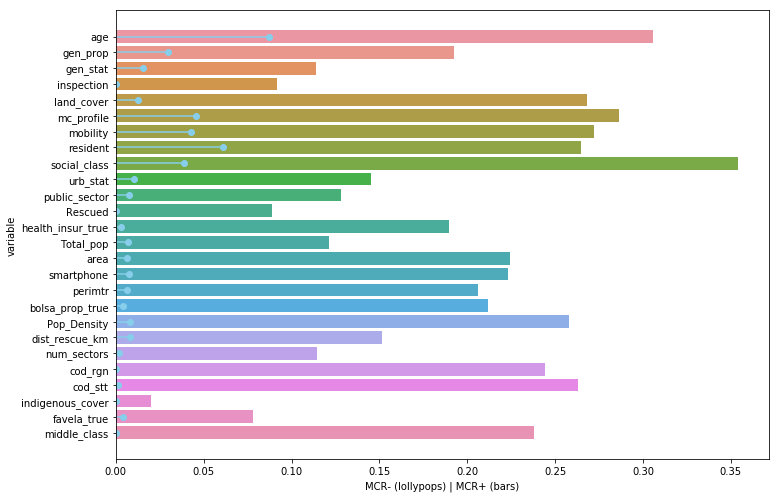

In [2]:
r1 = model.plot_mcr(X, y, feature_groups_of_interest = mcr_groupings, feature_names = grouping_names, num_times = 10, show_fig = True )

  0%|          | 0/26 [00:00<?, ?it/s]

 set_estimators(self, force_use = True, var_indexs = [0], debug = True )
Processing MCR+ groups of features.


  0%|          | 0/26 [00:00<?, ?it/s]

Processing MCR- groups of features.


100%|██████████| 26/26 [01:02<00:00,  2.41s/it]


MCR+ sum: 2.4341952407719685


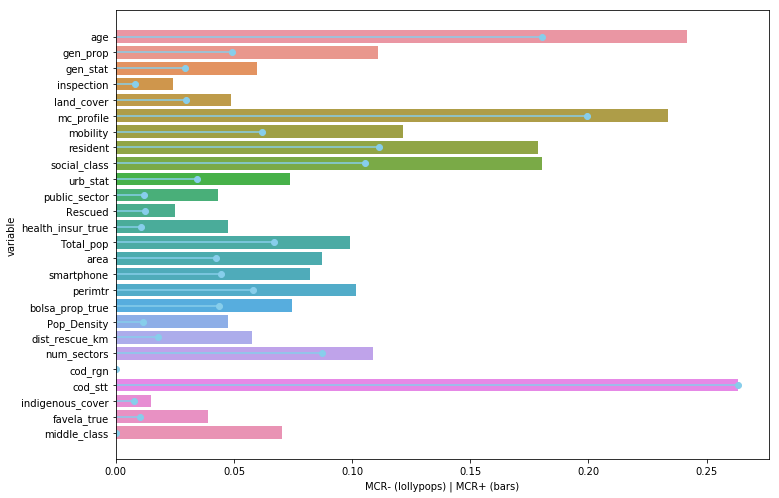

In [3]:
model.set_mcr_state(force_use = True, var_indexs = grouping_names2indexes['cod_stt'], debug = True )
r2 = model.plot_mcr(X, y, feature_groups_of_interest = mcr_groupings, feature_names = grouping_names, num_times = 10, show_fig = True )
